# EE353 ASSIGNMENT 4
#### PRIYANSH SINGH
#### 22b1856
#### LINK TO THE EXPLANATORY VIDEO:

In [ ]:
#allowing the collab notebook access to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
#data handling and basic math libraries
import pandas as pd #pandas for csv file reading and dataframe handling
import numpy as np #numpy for basic matrix computations

#time library for complexity analysis
import time

#plotting libraries
import matplotlib.pyplot as plt #for scatter and line plots of arrays
import seaborn as sns #for heatmaps

#scikit-learn - model selection
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

#scikit-learn - feature engineering
from sklearn.feature_selection import RFECV

#scikit-learn - feature importance
from sklearn.inspection import permutation_importance

#scikit-learn - clustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
 
#scikit-learn - manifold
from sklearn.manifold import TSNE

#scikit-learn - dimensionality reduction
from sklearn.decomposition import PCA

#scikit-learn - metrics 
from sklearn.metrics import davies_bouldin_score

#to save the trained models
import joblib

# Objective 1 - Data preprocessing

### Reading the dataset file

In [2]:
data = pd.read_csv("Customer-Data - 2.csv") #using pandas read csv to read the csv file

## 1.1 Data description [1]

- The dataset contains 18 features, giving insights on customer behaviour for 9000 customers for a duration of 6 months.

All the columns in the dataset comprise of continuous values.  
The behavioral features are as follows:
- 'BALANCE' - Balance amount left in the account
- 'BALANCE_FREQUENCY' -  How frequently the Balance is updated
- 'PURCHASES' - Amount of purchases made
- 'ONEOFF_PURCHASES' - Maximum purchase amount did in one-go
- 'INSTALLMENTS_PURCHASES' - Amount of purchase done in installment
- 'CASH_ADVANCE' - Cash in advance given by the user
- 'PURCHASES_FREQUENCY' - How frequently the Purchases are being made
- 'ONEOFF_PURCHASES_FREQUENCY' - How frequently Purchases are happening in one-go
- 'PURCHASES_INSTALLMENTS_FREQUENCY' - How frequently purchases in installments are being done
- 'CASH_ADVANCE_FREQUENCY' - How frequently the cash in advance being paid
- 'CASH_ADVANCE_TRX' - Number of Transactions made with “Cash in Advanced”
- 'PURCHASES_TRX' - Number of purchase transactions made
- 'CREDIT_LIMIT' - Limit of Credit Card for user
- 'PAYMENTS' - Amount of Payment done by the user
- 'MINIMUM_PAYMENTS' - Minimum amount of payments made by the user
- 'PRC_FULL_PAYMENT' - Percent of full payment paid by the user
- 'TENURE' - Tenure of credit card service for user

## 1.2 Correlation heatmap

<Axes: >

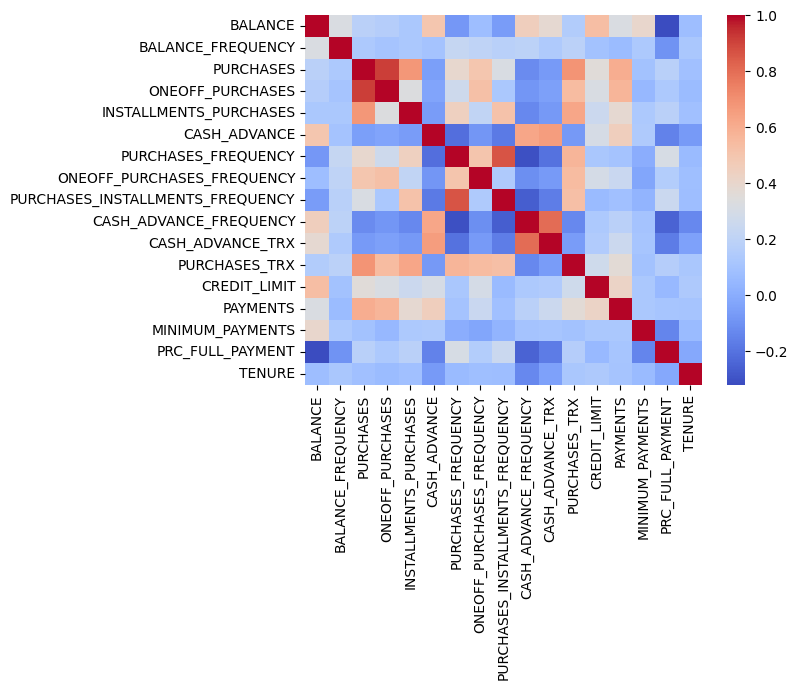

In [16]:
sns.heatmap(data.drop('CUST_ID', axis = 1).corr(), cmap = 'coolwarm')

# Objective 2 - Clustering

## 2a - K-means

In [35]:
X = data.dropna().reset_index().drop('index', axis = 1).drop('CUST_ID', axis = 1)

In [38]:
k_min = 2
min_score = davies_bouldin_score(X, KMeans(n_clusters = 2).fit(X).labels_)
for k in range(3, 100):
    kmeans = KMeans(n_clusters = k).fit(X) 
    score = davies_bouldin_score(X, kmeans.labels_)
    print(f"k = {k}, DB score = {score}")
    if(score < min_score):
      k_min = k
      min_score = score

k = 3, DB score = 1.6421306576537777
k = 4, DB score = 1.403511819233204
k = 5, DB score = 1.194175168528425
k = 6, DB score = 1.2459694146020153
k = 7, DB score = 1.1135449125429815
k = 8, DB score = 1.071340543827714
k = 9, DB score = 1.1247242294772701
k = 10, DB score = 1.044512857147245
k = 11, DB score = 1.0985964079750878
k = 12, DB score = 1.0393665623077382
k = 13, DB score = 1.0763393324487045
k = 14, DB score = 1.262349942633373
k = 15, DB score = 1.1232634536768418
k = 16, DB score = 1.1094754279930004
k = 17, DB score = 1.1158130915442308
k = 18, DB score = 1.1698056026907033
k = 19, DB score = 1.175797987876189
k = 20, DB score = 1.1560154178137223
k = 21, DB score = 1.1841871053362432
k = 22, DB score = 1.130675058158266
k = 23, DB score = 1.1679617736065109
k = 24, DB score = 1.227793088968144
k = 25, DB score = 1.2327818968048703
k = 26, DB score = 1.1545242117404002
k = 27, DB score = 1.1692981057392726
k = 28, DB score = 1.2025740485581065
k = 29, DB score = 1.220938

In [40]:
min_score

1.0393665623077382

# Objective 3 - PCA

# References:  
[1]: Description of the dataset taken from this [kaggle page](https://www.kaggle.com/datasets/alirezachahardoli/customer-data-clustring/data)    

[2]: ChatGPT was used for basic excel tasks such as finding the distribution of entries in a column, listing the unique entries in a column, etc.  
[3]: ChatGPT prompt: How to copy a dataframe into another dataframe.  
[4]: ChatGPT prompt: Pandas function for one-hot encoding of categorical columns in a dataframe  
[5]: ChatGPT prompt: Construct a correlation matrix indiced by the data column names rather than the column/row indices  
[6]: ChatGPT prompt: Dropping and resetting the row indices for a certain column data  
[7]: ChatGPT prompt: How to get an annotated heatamp with 'X' markers in the cells where the correlation > threshold   
[8]: ChatGPT prompt: How to save my model as a model file in torch and then load it for future use.  
[9]: ChatGPT prompt: How to apply a python function iteratively on multiple file paths.  
[10]: ChatGPT prompt: Logistic regression with adjustable regularization using scikit-learn.  
[11]: ChatGPT prompt: Random forest with a grid search on max depth and number of trees using scikit-learn.  
[12]: The scikit documentation was referred to for examples on SVM implementation: [scikit-learn SVM example](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters)  
[13]: The scikit documentation for implementing an MLP was referred to: [scikit-learn MLP example](https://scikit-learn.org/stable/modules/neural_networks_supervised)  
[14]: ChatGPT prompt: How to get parameter names of a scikit model  
[15]: For info on Permutation importance, the following website was referred: [Feature importance for RBF-SVM](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html).  
[16]: Tutorial and examples on recursive feature elimination: [RFECV](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html).  
[17]: The [transfer learning tutorial](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html) was referred to for pruning the output layer of a CNN and setting it up for evaluation.    
